In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score, log_loss
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import random
import itertools


In [80]:
url = 'https://github.com/Rakshith7890/logistic-regression/blob/main/diabetes.csv'
data_frame = pd.read_csv(url)

# Displaying the first 5 rows of the DataFrame
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
print(data_frame.shape)

(768, 9)


In [82]:
print(data_frame.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [83]:
print(data_frame.describe)

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [84]:
print(data_frame.dtypes)
print(data_frame.isnull().sum())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [85]:
X = data_frame.loc[:, data_frame.columns != 'Outcome']
y = data_frame.loc[:, 'Outcome']

In [86]:
X.shape, y.shape

((768, 8), (768,))

In [119]:
# We specify this so that the train and test data set always have the same rows, respectively
import random
random.seed(9)
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X,
                                                   y,
                                                   train_size = 0.80,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train_set.shape, X_test_set.shape, y_train_set.shape, y_test_set.shape

((614, 8), (154, 8), (614,), (154,))

In [88]:
X_train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
69,4,146,85,27,100,28.9,0.189,27
85,2,110,74,29,125,32.4,0.698,27
219,5,112,66,0,0,37.8,0.261,41
712,10,129,62,36,0,41.2,0.441,38


In [89]:
scaler= StandardScaler()
scaler.fit(X_train_set)
X_train_scaler = scaler.transform(X_train_set) # standardization of dependent variables
X_train_scaler.shape

(614, 8)

In [90]:
model = LogisticRegression()

model.fit(X_train_scaler, y_train_set)

LogisticRegression()

In [91]:
model.coef_

array([[ 0.348026  ,  1.16744472, -0.20085267, -0.05392645, -0.08823469,
         0.75218406,  0.42175873,  0.24357728]])

In [92]:
model.score(X_train_scaler, y_train_set)

0.7915309446254072

In [93]:
X_test_scaler = scaler.transform(X_test_set)
y_predicted = model.predict(X_test_scaler)

In [94]:
confuse_matrix = confusion_matrix(y_test_set, y_predicted)
confuse_matrix

array([[86, 15],
       [26, 27]])

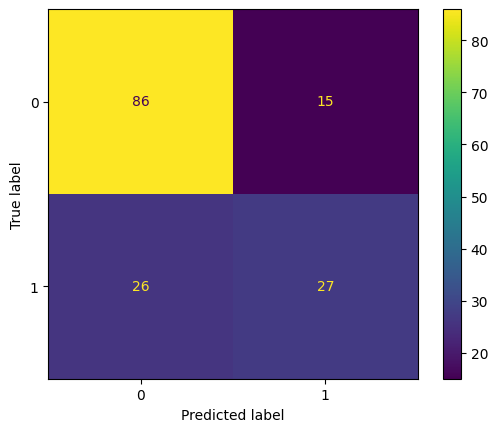

In [95]:
displaying = ConfusionMatrixDisplay(confusion_matrix = confuse_matrix,
                             display_labels = model.classes_)
displaying.plot()

In [96]:
metrics = [accuracy_score, precision_score, recall_score, f1_score]
results = {}

for metric in metrics:
    result = metric(y_test_set, y_predicted)
    results[metric.__name__] = result

print(results)

{'accuracy_score': 0.7337662337662337, 'precision_score': np.float64(0.6428571428571429), 'recall_score': np.float64(0.5094339622641509), 'f1_score': np.float64(0.5684210526315789)}


In [97]:
probabilities = model.predict_proba(X_test_scaler)
precision, recall,  thersholds = precision_recall_curve(y_test_set, probabilities[:,1])

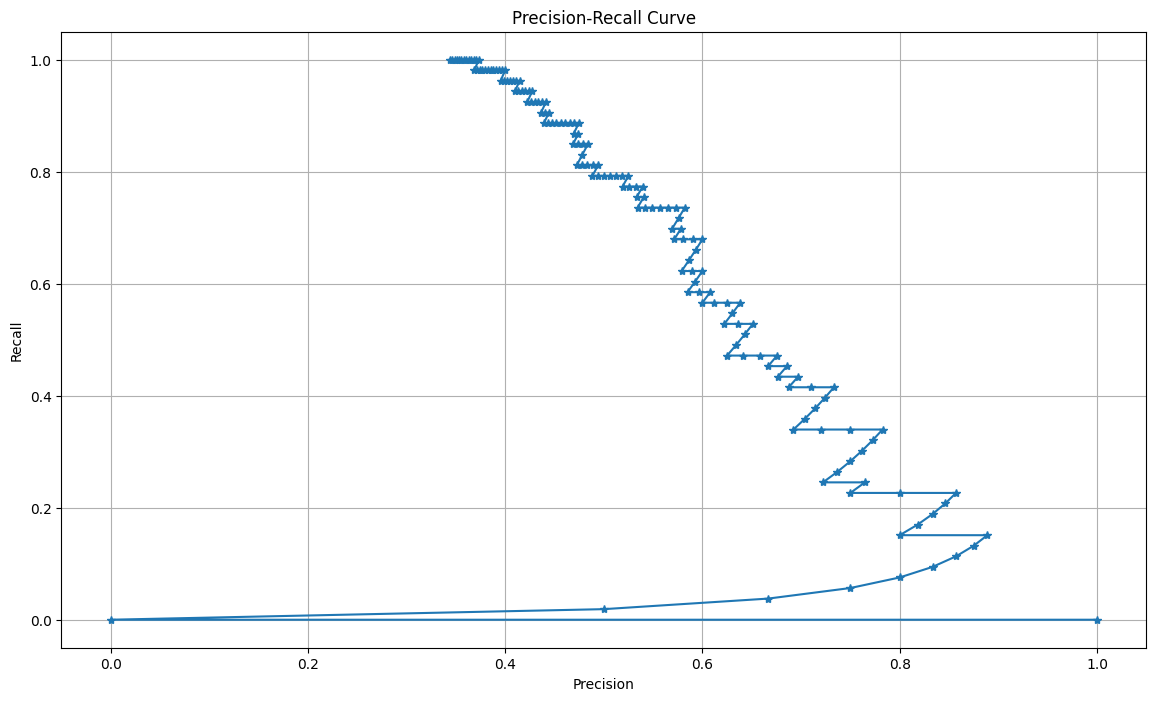

In [118]:
plt.figure(figsize=(14, 8))
plt.plot(precision, recall, marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [99]:
y_predicted_probability = model.predict_proba(X_test_set)
log_loss(y_test_set, y_predicted_probability)

23.639019430524886

In [100]:
dataset_link = 'https://github.com/Rakshith7890/logistic-regression/blob/main/cancer.csv'
cancer_df = pd.read_csv(dataset_link)
print(cancer_df.shape)
print(cancer_df.columns)
print(cancer_df.dtypes)
print(cancer_df.describe)
print(cancer_df.isnull().sum())

cancer_df = cancer_df.loc[:, ~cancer_df.columns.isin(['id', 'Unnamed: 32'])]
cancer_df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
cancer_df.head()

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave po

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
cancer_features = cancer_df.drop(columns=['diagnosis'])
cancer_target = cancer_df['diagnosis']



In [102]:
random.seed(9)
cancer_features_train, cancer_features_test, cancer_target_train, cancer_target_test = train_test_split(cancer_features,
                                                   cancer_target,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
print(cancer_features_train.shape, cancer_features_test.shape, cancer_target_train.shape, cancer_target_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [103]:
cancer_normalizer = StandardScaler()
cancer_features_normalized = cancer_normalizer.fit_transform(cancer_features)
cancer_features_train_normalized = cancer_normalizer.transform(cancer_features_train)
cancer_features_test_normalized = cancer_normalizer.transform(cancer_features_test)

In [104]:
cancer_classifier = LogisticRegression()
cancer_classifier.fit(cancer_features_train_normalized, cancer_target_train)
print('Training accuracy:', cancer_classifier.score(cancer_features_train_normalized, cancer_target_train))
print('Test accuracy:', cancer_classifier.score(cancer_features_test_normalized, cancer_target_test))

cancer_target_predicted = cancer_classifier.predict(cancer_features_test_normalized)
print("Accuracy Score: ", accuracy_score(cancer_target_test, cancer_target_predicted),
      "\nPrecision Score: ", precision_score(cancer_target_test, cancer_target_predicted),
      "\nRecall Score: ", recall_score(cancer_target_test, cancer_target_predicted),
      "\nF1 Score: ", f1_score(cancer_target_test, cancer_target_predicted))

Training accuracy: 0.9934065934065934
Test accuracy: 0.9736842105263158
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 
F1 Score:  0.968421052631579


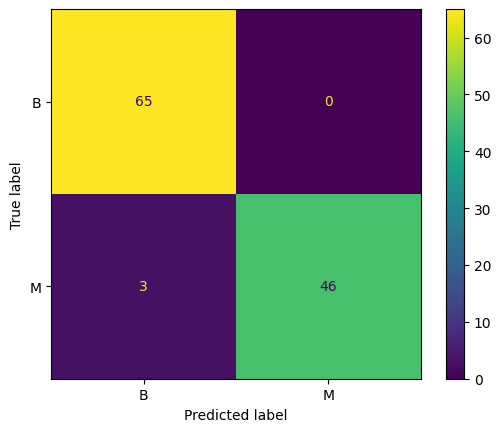

In [105]:
cancer_confusion_matrix = confusion_matrix(cancer_target_test, cancer_target_predicted)
cancer_confusion_display = ConfusionMatrixDisplay(confusion_matrix = cancer_confusion_matrix,
                             display_labels = ['B','M'])
cancer_confusion_display.plot()
plt.show()

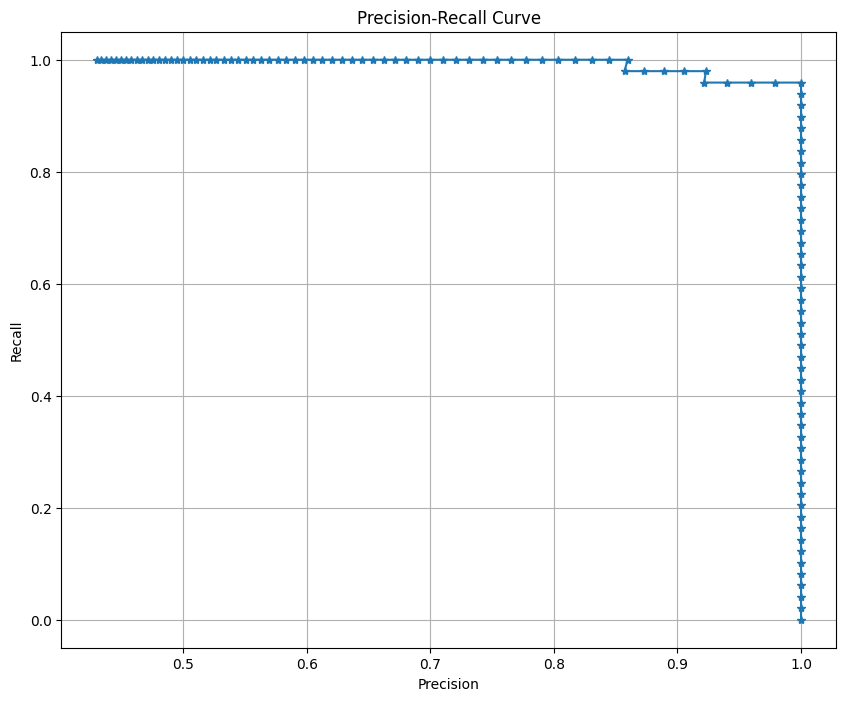

In [106]:
prediction_probabilities = cancer_classifier.predict_proba(cancer_features_test_normalized)
precision_values, recall_values, threshold_values = precision_recall_curve(cancer_target_test, prediction_probabilities[:,1])

plt.figure(figsize=(10, 8))
plt.plot(precision_values, recall_values, marker='*')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [107]:
cancer_predicted_proba = cancer_classifier.predict_proba(cancer_features_test)
print("Log Loss:", log_loss(cancer_target_test, cancer_predicted_proba))


Log Loss: 20.551205879759774


In [123]:
regularization_strengths = [70, 7, .7, .007]
for strength in regularization_strengths:
    l1_classifier = LogisticRegression(penalty='l1', C=strength, solver='liblinear')
    l1_classifier.fit(cancer_features_train_normalized, cancer_target_train)
    print('Regularization strength:', strength)
    cancer_target_predicted = l1_classifier.predict(cancer_features_test_normalized)
    print("Accuracy Score: ", accuracy_score(cancer_target_test, cancer_target_predicted),
         "\nPrecision Score: ", precision_score(cancer_target_test, cancer_target_predicted),
         "\nRecall Score: ", recall_score(cancer_target_test, cancer_target_predicted),
          "\nF1 Score: ", f1_score(cancer_target_test, cancer_target_predicted))
    print('Training accuracy:', l1_classifier.score(cancer_features_train_normalized, cancer_target_train))
    print('Test accuracy:', l1_classifier.score(cancer_features_test_normalized, cancer_target_test))
    print('')

Regularization strength: 70
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333334
Training accuracy: 0.9978021978021978
Test accuracy: 0.9649122807017544

Regularization strength: 7
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333334
Training accuracy: 0.9934065934065934
Test accuracy: 0.9649122807017544

Regularization strength: 0.7
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383
Training accuracy: 0.9912087912087912
Test accuracy: 0.9649122807017544

Regularization strength: 0.007
Accuracy Score:  0.9035087719298246 
Precision Score:  0.8653846153846154 
Recall Score:  0.9183673469387755 
F1 Score:  0.8910891089108911
Training accuracy: 0.9120879120879121
Test accuracy: 0.9035087719298246



In [109]:
nb_classifier = GaussianNB()
nb_classifier.fit(cancer_features_train_normalized, cancer_target_train)
print('Training accuracy:', nb_classifier.score(cancer_features_train_normalized, cancer_target_train))

nb_predictions = nb_classifier.predict(cancer_features_test_normalized)
print("Accuracy Score: ", accuracy_score(cancer_target_test, nb_predictions),
      "\nPrecision Score: ", precision_score(cancer_target_test, nb_predictions),
      "\nRecall Score: ", recall_score(cancer_target_test, nb_predictions),
      "\nF1 Score: ", f1_score(cancer_target_test, nb_predictions))

Training accuracy: 0.9362637362637363
Accuracy Score:  0.9385964912280702 
Precision Score:  0.9565217391304348 
Recall Score:  0.8979591836734694 
F1 Score:  0.9263157894736842


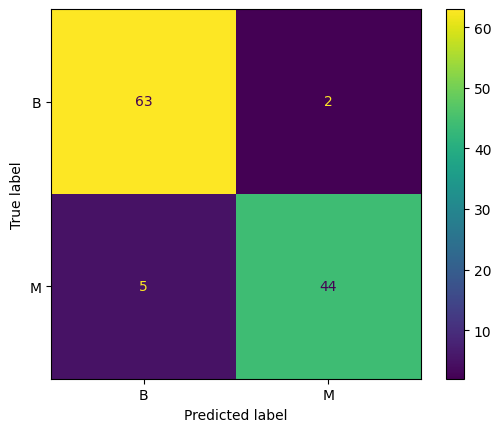

In [110]:
nb_confusion_matrix = confusion_matrix(cancer_target_test, nb_predictions)
nb_confusion_display = ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix,
                             display_labels = ['B' , 'M'])
nb_confusion_display.plot()
plt.show()

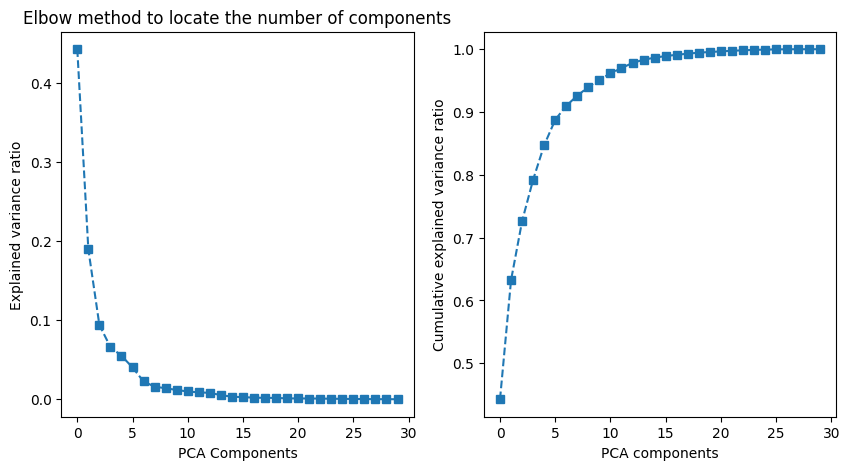

In [111]:
pca_full = PCA()
pca_full.fit(cancer_features_normalized)
pca_transformed = pca_full.transform(cancer_features_normalized)

variance_ratios = pca_full.explained_variance_ratio_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(variance_ratios,'s--')
plt.xlabel('PCA Components')
plt.ylabel('Explained variance ratio')
plt.title('Elbow method to locate the number of components')
cumulative_variance = list(itertools.accumulate(variance_ratios))
plt.subplot(1,2,2)
plt.plot(cumulative_variance,'s--')
plt.xlabel('PCA components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


In [112]:
pca_6 = PCA(n_components=6)
pca_6.fit(cancer_features_normalized)
pca_6_components = pca_6.transform(cancer_features_normalized)
pca_column_names = ['pc' + str(i) for i in range(1, 7)]
pca_df = pd.DataFrame(data=pca_6_components, columns=pca_column_names)
pca_df['Target'] = cancer_target
print(pca_df.head())

        pc1        pc2       pc3       pc4       pc5       pc6  Target
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424       1
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656       1
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452       1
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422       1
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495       1


In [113]:
pca_features = pca_df.iloc[:, :-1]  # Assuming 'Target' is the last column
pca_target = pca_df.iloc[:, -1]

random.seed(9)
pca_features_train, pca_features_test, pca_target_train, pca_target_test = train_test_split(pca_features,
                                                   pca_target,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
print(pca_features_train.shape, pca_features_test.shape, pca_target_train.shape, pca_target_test.shape)

(455, 6) (114, 6) (455,) (114,)


In [114]:
pca_logistic_model = LogisticRegression()
pca_logistic_model.fit(pca_features_train, pca_target_train)
print('Training accuracy:', pca_logistic_model.score(pca_features_train, pca_target_train))
pca_logistic_predictions = pca_logistic_model.predict(pca_features_test)
print("Accuracy Score: ", accuracy_score(pca_target_test, pca_logistic_predictions),
      "\nPrecision Score: ", precision_score(pca_target_test, pca_logistic_predictions),
      "\nRecall Score: ", recall_score(pca_target_test, pca_logistic_predictions),
      "\nF1 Score: ", f1_score(pca_target_test, pca_logistic_predictions))

Training accuracy: 0.9802197802197802
Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474226


In [115]:
pca_nb_model = GaussianNB()
pca_nb_model.fit(pca_features_train, pca_target_train)
print('Training accuracy:', pca_nb_model.score(pca_features_train, pca_target_train))
pca_nb_predictions = pca_nb_model.predict(pca_features_test)
print("Accuracy Score: ", accuracy_score(pca_target_test, pca_nb_predictions),
      "\nPrecision Score: ", precision_score(pca_target_test, pca_nb_predictions),
      "\nRecall Score: ", recall_score(pca_target_test, pca_nb_predictions),
      "\nF1 Score: ", f1_score(pca_target_test, pca_nb_predictions))

Training accuracy: 0.9362637362637363
Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369


In [116]:
for num_components in range(6, 30, 2):
    pca_model = PCA(n_components=num_components)
    pca_model.fit(cancer_features_normalized)
    pca_components = pca_model.transform(cancer_features_normalized)
    pca_df = pd.DataFrame(pca_components, columns=[f'pc{j}' for j in range(1, num_components+1)])
    pca_df['Target'] = cancer_target
    pca_features = pca_df.drop(columns=['Target'])
    pca_target = pca_df['Target']
    random.seed(9)
    pca_features_train, pca_features_test, pca_target_train, pca_target_test = train_test_split(pca_features,
                                                      pca_target,
                                                      train_size = 0.8,
                                                      test_size = 0.20,
                                                      random_state = 100)
    pca_logistic_model = LogisticRegression()
    pca_logistic_model.fit(pca_features_train, pca_target_train)
    pca_logistic_model.score(pca_features_train, pca_target_train)
    pca_logistic_predictions = pca_logistic_model.predict(pca_features_test)
    print("\nNumber of components: ", num_components)
    print("Maximum ratio: ", np.cumsum(pca_model.explained_variance_ratio_)[-1])
    print("Accuracy Score: ", accuracy_score(pca_target_test, pca_logistic_predictions),
          "\nPrecision Score: ", precision_score(pca_target_test, pca_logistic_predictions),
          "\nRecall Score: ", recall_score(pca_target_test, pca_logistic_predictions),
          "\nF1 Score: ", f1_score(pca_target_test, pca_logistic_predictions))


Number of components:  6
Maximum ratio:  0.8875879635669058
Accuracy Score:  0.956140350877193 
Precision Score:  0.9583333333333334 
Recall Score:  0.9387755102040817 
F1 Score:  0.9484536082474226

Number of components:  8
Maximum ratio:  0.9259825386969442
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9787234042553191 
Recall Score:  0.9387755102040817 
F1 Score:  0.9583333333333334

Number of components:  10
Maximum ratio:  0.9515688143366668
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

Number of components:  12
Maximum ratio:  0.9700713832200258
Accuracy Score:  0.9649122807017544 
Precision Score:  1.0 
Recall Score:  0.9183673469387755 
F1 Score:  0.9574468085106383

Number of components:  14
Maximum ratio:  0.9833502905469195
Accuracy Score:  0.9736842105263158 
Precision Score:  1.0 
Recall Score:  0.9387755102040817 
F1 Score:  0.968421052631579

Number of components:  16
Maximum rati

In [124]:
for num_components in range(6, 20, 2):
    pca_model = PCA(n_components=num_components)
    pca_model.fit(cancer_features_normalized)
    pca_components = pca_model.transform(cancer_features_normalized)
    pca_df = pd.DataFrame(pca_components, columns=[f'pc{j}' for j in range(1, num_components+1)])
    pca_df['Target'] = cancer_target
    pca_features = pca_df.drop(columns=['Target'])
    pca_target = pca_df['Target']
    random.seed(9)
    pca_features_train, pca_features_test, pca_target_train, pca_target_test = train_test_split(pca_features,
                                                      pca_target,
                                                      train_size = 0.8,
                                                      test_size = 0.20,
                                                      random_state = 100)
    pca_nb_model = GaussianNB()
    pca_nb_model.fit(pca_features_train, pca_target_train)
    pca_nb_model.score(pca_features_train, pca_target_train)
    pca_nb_predictions = pca_nb_model.predict(pca_features_test)
    print("\nNumber of components: ", num_components)
    print("Maximum ratio: ", np.cumsum(pca_model.explained_variance_ratio_)[-1])
    print("Accuracy Score: ", accuracy_score(pca_target_test, pca_nb_predictions),
          "\nPrecision Score: ", precision_score(pca_target_test, pca_nb_predictions),
          "\nRecall Score: ", recall_score(pca_target_test, pca_nb_predictions),
          "\nF1 Score: ", f1_score(pca_target_test, pca_nb_predictions))



Number of components:  6
Maximum ratio:  0.8875879635669058
Accuracy Score:  0.9210526315789473 
Precision Score:  0.9347826086956522 
Recall Score:  0.8775510204081632 
F1 Score:  0.9052631578947369

Number of components:  8
Maximum ratio:  0.9259825386969442
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

Number of components:  10
Maximum ratio:  0.9515688143366668
Accuracy Score:  0.9122807017543859 
Precision Score:  0.9534883720930233 
Recall Score:  0.8367346938775511 
F1 Score:  0.8913043478260869

Number of components:  12
Maximum ratio:  0.9700713832200258
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.8791208791208791

Number of components:  14
Maximum ratio:  0.9833502905469195
Accuracy Score:  0.9035087719298246 
Precision Score:  0.9523809523809523 
Recall Score:  0.8163265306122449 
F1 Score:  0.879120879